<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

# Assignment:

- Replicate the lesson code.

 - This means that if you haven't followed along already, type out the things that we did in class. Forcing your fingers to hit each key will help you internalize the syntax of what we're doing. Make sure you understand each line of code that you're writing, google things that you don't fully understand.
 - [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)
- Convert the `term` column from string to integer.
- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.
- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [0]:
##### Begin Working Here #####
import pandas as pd
import numpy as np

In [0]:
# Lets take a look at the Ames Iowa Housing Dataset:
source_url = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv'

In [0]:
iowa = pd.read_csv(source_url)

In [171]:
iowa.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,NormalCondition,LotShape3,top_neighbors
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,1,Regular,College Circle
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,1,Regular,All Others
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,1,Irregular,College Circle
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,0,Irregular,All Others
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,1,Irregular,All Others


In [175]:
iowa.shape

(1460, 81)

In [173]:
iowa.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,NormalCondition
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890,0.820548
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883,0.383862
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,0.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000,1.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,1.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,1.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000,1.000000


In [0]:
# column types
# pd.set_option('display.max_rows', 100)
iowa.dtypes

In [177]:
iowa['BedroomAbvGr'].dtype

dtype('int64')

In [178]:
iowa.Fireplaces.sample(4)

340     0
1227    0
1325    0
907     1
Name: Fireplaces, dtype: int64

In [176]:
iowa['LotFrontage'].head()

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
Name: LotFrontage, dtype: float64

In [179]:
iowa['LotFrontage'].value_counts(dropna=False)

NaN      259
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 111, dtype: int64

In [185]:
np.nan

nan

In [184]:
type(np.nan)

float

In [183]:
# how much missing data
iowa['LotFrontage'].isnull().sum()

259

In [186]:
# now how much missing data?
iowa.shape

(1460, 82)

In [0]:
# I can make a smaller dataframe with a few specific column headers
# by passing a list of column headers inside of the square brackets
small = iowa[['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'SalePrice']].copy()

In [193]:
# Lets add up all of the square footage to get a single square footage 
# column for the entire dataset
small['TotalSF'] = small['TotalBsmtSF'] + small['1stFlrSF'] + small['2ndFlrSF']
small.head()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSF
0,856,856,854,208500,2566
1,1262,1262,0,181500,2524
2,920,920,866,223500,2706
3,756,961,756,140000,2473
4,1145,1145,1053,250000,3343


In [182]:
# Lets make a nother new column that is 'PricePerSqFt' by
# dividing the price by the square footage
small['PricePerSqFt'] = small['SalePrice'] / small['TotalSF']
small.head()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSF,PricePerSqFt
0,856,856,854,208500,2566,81.254871
1,1262,1262,0,181500,2524,71.909667
2,920,920,866,223500,2706,82.594235
3,756,961,756,140000,2473,56.611403
4,1145,1145,1053,250000,3343,74.783129


In [180]:
# what are some categorical columns?
iowa[['LotShape', 'Alley', 'Street', 'SaleCondition']].sample(5)

,LotShape,Alley,Street,SaleCondition
1219,Reg,NaN,Pave,Abnorml
678,IR1,NaN,Pave,Partial
388,IR1,NaN,Pave,Normal
1272,IR1,NaN,Pave,Normal
483,Reg,NaN,Pave,Normal


In [190]:
# values of sale condition
iowa['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [0]:
# create a new categorical variable
iowa['NormalCondition'] = np.where(iowa['SaleCondition'] == 'Normal', 1, 0)

In [192]:
# Map this from four down to 3 values
iowa['LotShape3'] = iowa['LotShape'].map({'Reg': 'Regular', 'IR1': 'Irregular', 'IR2': 'Other', 'IR3': 'Other'})
iowa.LotShape3.value_counts()

Regular      925
Irregular    484
Other         51
Name: LotShape3, dtype: int64

In [194]:
# value counts of a categorical variable
iowa.Neighborhood.value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [181]:
# replace using .loc 
iowa['top_neighbors'] = 'All Others'
iowa.top_neighbors.head()

0    All Others
1    All Others
2    All Others
3    All Others
4    All Others
Name: top_neighbors, dtype: object

In [188]:
iowa.loc[iowa['Neighborhood'] == 'NAmes', 'top_neighbors'] = 'North Ames'
iowa[['top_neighbors', 'Neighborhood']].sample(10)

,top_neighbors,Neighborhood
1174,All Others,Crawfor
785,All Others,NWAmes
971,All Others,NridgHt
1256,All Others,NoRidge
461,All Others,SWISU
59,College Circle,CollgCr
300,All Others,Crawfor
1401,All Others,Gilbert
755,All Others,Somerst
1166,College Circle,CollgCr


In [187]:
iowa.loc[iowa['Neighborhood'] == 'CollgCr', 'top_neighbors'] = 'College Circle'
iowa[['top_neighbors', 'Neighborhood']].sample(10)

,top_neighbors,Neighborhood
694,All Others,BrkSide
590,College Circle,CollgCr
1263,All Others,BrkSide
378,All Others,StoneBr
195,All Others,NPkVill
594,College Circle,CollgCr
17,All Others,Sawyer
646,All Others,NAmes
542,All Others,NWAmes
705,All Others,IDOTRR


In [196]:
iowa.loc[iowa['Neighborhood'] == 'Gilbert', 'top_neighbors'] = 'Favorite Neighborhood'
iowa.loc[iowa['Neighborhood'] == 'Somerset', 'top_neighbors'] = 'Favorite Neighborhood'
iowa[['top_neighbors', 'Neighborhood']].sample(10)

,top_neighbors,Neighborhood
793,All Others,Somerst
1315,North Ames,NAmes
442,All Others,BrkSide
893,All Others,Sawyer
1300,Favorite Neighborhood,Gilbert
194,College Circle,CollgCr
688,All Others,StoneBr
757,All Others,Sawyer
1040,All Others,Sawyer
469,All Others,SawyerW


In [195]:
iowa['top_neighbors'].value_counts()

All Others        1085
North Ames         225
College Circle     150
Name: top_neighbors, dtype: int64

In [197]:
# crosstab!
pd.crosstab(iowa.top_neighbors, iowa.LotShape3)

LotShape3,Irregular,Other,Regular
top_neighbors,,,
All Others,312,27,667
College Circle,53,11,86
Favorite Neighborhood,53,11,15
North Ames,66,2,157


In [199]:
# margins
pd.crosstab(iowa.top_neighbors, iowa.LotShape3, margins=True)

LotShape3,Irregular,Other,Regular,All
top_neighbors,,,,
All Others,312,27,667,1006
College Circle,53,11,86,150
Favorite Neighborhood,53,11,15,79
North Ames,66,2,157,225
All,484,51,925,1460


In [200]:
# as proportions
pd.crosstab(iowa.top_neighbors, iowa.LotShape3, normalize='index', margins=True)

LotShape3,Irregular,Other,Regular
top_neighbors,,,
All Others,0.310139,0.026839,0.663022
College Circle,0.353333,0.073333,0.573333
Favorite Neighborhood,0.670886,0.139241,0.189873
North Ames,0.293333,0.008889,0.697778
All,0.331507,0.034932,0.633562


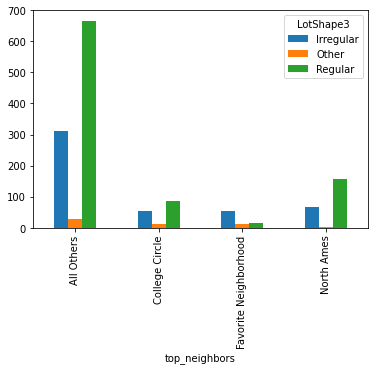

In [204]:
myresults = pd.crosstab(iowa.top_neighbors, iowa.LotShape3)
myresults.plot(kind='bar')

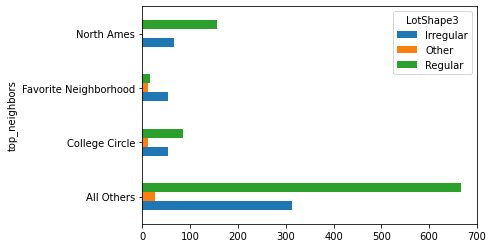

In [217]:
myresults.plot(kind='barh')

In [223]:
! wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
!unzip LoanStats_2018Q4.csv.zip

--2020-05-11 00:22:51--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 54.71.0.232, 52.26.240.115, 50.112.20.251
Connecting to resources.lendingclub.com (resources.lendingclub.com)|54.71.0.232|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip.1’

LoanStats_2018Q4.cs     [              <=>   ]  22.05M  2.02MB/s    in 11s     

2020-05-11 00:23:03 (2.01 MB/s) - ‘LoanStats_2018Q4.csv.zip.1’ saved [23121687]

Archive:  LoanStats_2018Q4.csv.zip
replace LoanStats_2018Q4.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [198]:
loans = pd.read_csv('LoanStats_2018Q4.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,7,13,18,19,24,25,27,28,29,30,31,32,34,36,37,38,39,40,41,42,43,44,46,49,50,51,53,54,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,113,114,115,116,117,118,119,120,121,126,127,131,132,134,135,136,141,142,143) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [208]:
loans.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
128407,NaN,NaN,23000,23000,23000.0,36 months,15.02%,797.53,C,C3,Tax Consultant,10+ years,MORTGAGE,75000.0,Source Verified,Oct-2018,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,352xx,AL,20.95,1,Aug-1985,2,22.0,NaN,12,0,22465,43.6%,28,w,0.00,0.00,1547.08,1547.08,...,14.3,0,0,296500,40614,47100,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128408,NaN,NaN,10000,10000,10000.0,36 months,15.02%,346.76,C,C3,security guard,5 years,MORTGAGE,38000.0,Not Verified,Oct-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,443xx,OH,13.16,3,Jul-1982,0,6.0,NaN,11,0,5634,37.1%,16,w,5557.25,5557.25,6233.34,6233.34,...,40.0,0,0,91403,9323,9100,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128409,NaN,NaN,5000,5000,5000.0,36 months,13.56%,169.83,C,C1,Payoff Clerk,10+ years,MORTGAGE,35360.0,Not Verified,Oct-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,381xx,TN,11.30,1,Jun-2006,0,21.0,NaN,9,0,2597,27.3%,15,f,2751.79,2751.79,3053.17,3053.17,...,50.0,0,0,93908,4976,3000,6028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128410,NaN,NaN,10000,10000,9750.0,36 months,11.06%,327.68,B,B3,NaN,NaN,RENT,44400.0,Source Verified,Oct-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,980xx,WA,11.78,0,Oct-2008,2,40.0,NaN,15,0,6269,13.1%,25,f,5411.74,5276.45,5882.88,5735.81,...,0.0,0,0,57871,16440,20500,10171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128411,NaN,NaN,10000,10000,10000.0,36 months,16.91%,356.08,C,C5,Key Accounts Manager,2 years,RENT,80000.0,Not Verified,Oct-2018,Current,n,NaN,NaN,other,Other,021xx,MA,17.72,1,Sep-2006,0,14.0,NaN,17,0,1942,30.8%,31,w,5626.39,5626.39,6400.05,6400.05,...,0.0,0,0,73669,59194,4000,67369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
# We can fix the header problem by using the 'skiprows' parameter
loans = pd.read_csv('LoanStats_2018Q4.csv', header=1, skipfooter=2, engine='python')

In [201]:
loans.head()

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
id  member_id loan_amnt funded_amnt funded_amnt_inv term       int_rate installment grade sub_grade emp_title             emp_length home_ownership annual_inc verification_status issue_d  loan_status pymnt_plan url desc purpose            title                   zip_code addr_state dti   delinq_2yrs earliest_cr_line inq_last_6mths mths_since_last_delinq mths_since_last_record open_acc pub_rec revol_bal revol_util total_acc initial_list_status out_prncp out_prncp_inv total_pymnt      total_pymnt_inv total_rec_prncp total_rec_int total_rec_late_fee recoveries collection_recovery_fee last_pymnt_d last_pymnt_amnt next_pymnt_d last_credit_pull_d collections_12_mths_ex_med mths_since_last_major_derog policy_code application_type annual_inc_joint dti_joint verification_status_joint acc_now_delinq tot_coll_amt tot_cur_bal open_acc_6m open_act_il open_il_12m open_il_24m mths_since_rcnt_il total_bal_il il_util open_rv_12m open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi total_cu_tl inq_last_12m acc_open_past_24mths avg_cur_bal bc_open_to_buy bc_util chargeoff_within_12_mths delinq_amnt mo_sin_old_il_acct mo_sin_old_rev_tl_op mo_sin_rcnt_rev_tl_op mo_sin_rcnt_tl mort_acc mths_since_recent_bc mths_since_recent_bc_dlq mths_since_recent_inq mths_since_recent_revol_delinq num_accts_ever_120_pd num_actv_bc_tl num_actv_rev_tl num_bc_sats num_bc_tl num_il_tl num_op_rev_tl num_rev_accts num_rev_tl_bal_gt_0 num_sats num_tl_120dpd_2m num_tl_30dpd num_tl_90g_dpd_24m num_tl_op_past_12m pct_tl_nvr_dlq percent_bc_gt_75 pub_rec_bankruptcies tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit total_il_high_credit_limit revol_bal_joint sec_app_earliest_cr_line sec_app_inq_last_6mths sec_app_mort_acc sec_app_open_acc sec_app_revol_util sec_app_open_act_il sec_app_num_rev_accts sec_app_chargeoff_within_12_mths sec_app_collections_12_mths_ex_med sec_app_mths_since_last_major_derog hardship_flag hardship_type hardship_reason hardship_status deferral_term hardship_amount hardship_start_date hardship_end_date payment_plan_start_date hardship_length hardship_dpd hardship_loan_status orig_projected_additional_accrued_interest hardship_payoff_balance_amount hardship_last_payment_amount debt_settlement_flag debt_settlement_flag_date settlement_status settlement_date settlement_amount settlement_percentage                                    settlement_term                              
NaN NaN       10000     10000       10000            60 months  16.14%  243.93      C     C4        Sale Consultant       2 years    RENT           90000      Not Verified        Dec-2018 Fully Paid  n          NaN NaN  debt_consolidation Debt consolidation      079xx    NJ         8.8   0           Mar-1991         1              NaN                    43                     11       1       10582     58.5%      32        w                   0.00      0.00          10661.0577272374 10661.06        10000.00        661.06        0.0                0.0        0.0                     May-2019     9698.79         NaN          Dec-2019           0                          NaN                         1           Individual       NaN              NaN       NaN                       0              0            15470       1           1           0           1           18                 4888         65      1           3           2969       60       18100            2      0           2            4                    1719        4906           67.3    0                        0           133                333                  2                     2              1        2                    NaN                      1                     NaN                            0                     4              6               5           15        6         8             23            6                   11       0                0            0                  1                  100            80   

In [0]:
# Sum null values by column and sort from least to greatest
pd.set_option('display.max_rows', 1000)
loans.isnull().sum().sort_values(ascending=False)

In [222]:
loans.shape

(128412, 145)

In [0]:
loans.drop('url', axis=1, inplace=True)

In [206]:
loans.int_rate.head(10)

0     16.14%
1     11.80%
2     11.31%
3     14.47%
4     27.27%
5     16.14%
6     12.98%
7     12.98%
8     10.33%
9     23.40%
Name: int_rate, dtype: object

In [205]:
loans.int_rate[3]

' 14.47%'

In [230]:
loans.int_rate.dtype

dtype('O')

In [231]:
type(loans.int_rate[3])

str

In [0]:
# Lets start with just fixing a single string.
# If we can fix one, we can usually fix all of them
int_rate = ' 14.47%'

In [233]:
# remove leading space
int_rate = int_rate.lstrip()
print(int_rate)

14.47%


In [234]:
# remove percent
int_rate = int_rate.strip('%')
print(int_rate)

14.47


In [235]:
# remove both
int_rate = int_rate.lstrip().strip('%')
print(int_rate)

14.47


In [236]:
# "Cast" the string value to a float
float(int_rate)

14.47

In [0]:
# put it all together
int_rate = float(int_rate.lstrip().strip('%'))

In [0]:
int_rate = ' 14.47%'

In [240]:
# check our work
type(float(int_rate.lstrip().strip('%')))

float

In [0]:
int_rate = ' 14.47%'

In [0]:
# Write a function that can do what we have written above to any 
# string that is passsed to it.
def myfunc(cell_contents):
  if type(cell_contents) == str:
    return float(cell_contents.lstrip().strip('%'))
  else:
    return float(cell_contents.strip('%'))

In [243]:
# Test out our function by calling it on our example
myfunc(int_rate)

14.47

In [244]:
type(myfunc(int_rate))

float

In [0]:
# for loop:
newlist = []
for cell in loans['int_rate']:
  newlist.append(myfunc(cell))

In [246]:
newlist[:10]

[16.14, 11.8, 11.31, 14.47, 27.27, 16.14, 12.98, 12.98, 10.33, 23.4]

In [247]:
print(loans['int_rate'].head())
list(loans['int_rate'][:10])

0     16.14%
1     11.80%
2     11.31%
3     14.47%
4     27.27%
Name: int_rate, dtype: object


[' 16.14%',
 ' 11.80%',
 ' 11.31%',
 ' 14.47%',
 ' 27.27%',
 ' 16.14%',
 ' 12.98%',
 ' 12.98%',
 ' 10.33%',
 ' 23.40%']

In [0]:
loans['int_rate_clean'] = pd.Series(newlist)

In [249]:
loans['int_rate_clean'].dtype

dtype('float64')

In [0]:
# improve all of this code with the .apply function!
loans['int_rate_clean2'] = loans['int_rate'].apply(myfunc)

In [251]:
# look at the top 20 rows
loans.emp_title.head(20)

0        Other
1        Other
2        Other
3        Other
4        Other
5        Other
6        Other
7        Other
8       Driver
9        Other
10       Other
11       Other
12       Other
13       Other
14       Other
15       Other
16       Other
17    Engineer
18       Other
19       Other
Name: emp_title, dtype: object

In [252]:
# Look at the top 20 employment titles
loans.emp_title.value_counts(dropna=False).head(20)

Other                 115709
Teacher                 2090
Manager                 1773
Registered Nurse         952
Driver                   924
RN                       726
Supervisor               697
Sales                    580
Project Manager          526
General Manager          523
Office Manager           521
Owner                    420
Director                 402
Operations Manager       387
Truck Driver             387
Nurse                    326
Engineer                 325
Sales Manager            304
manager                  301
Supervisor               270
Name: emp_title, dtype: int64

In [253]:
# How many different unique employment titles are there currently?
loans.emp_title.describe()

count     128412
unique        21
top        Other
freq      115709
Name: emp_title, dtype: object

In [254]:
# another way to do this
loans.emp_title.nunique()

21

In [255]:
# How often is the employment_title null?
loans.emp_title.isnull().sum()

0

In [0]:
# Create some examples that represent the cases that we want to clean up
examples = ['owner', 'Supervisor', ' Project Manager', np.nan]

In [257]:
# do that same function in individual steps
type('Supervisor')
isinstance('Supervisor', str)

True

In [258]:
# what about the strip?
' supervisor'.title().strip()

'Supervisor'

In [0]:
# Write a function to clean up these use cases and increase uniformity.
def cleantitle(jobtitle):
  if isinstance(jobtitle, str):
    return(jobtitle.title().strip())
  else:
    return 'Unknown'

In [260]:
# test our function
cleantitle(' sUpErViSoR')

'Supervisor'

In [0]:
# create a for loop:
mylist = []
for jobtitle in examples:
  mylist.append(cleantitle(jobtitle))

In [0]:
# We have a function that works as expected. Lets apply it to our column.
# This time we'll overwrite the original column
loans['clean_title'] = loans['emp_title'].apply(cleantitle)


In [296]:
# list all columns
pd.set_option('display.max_seq_items', 160)
loans.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_de

In [264]:
# check out one column
loans.issue_d

0         Dec-2018
1         Dec-2018
2         Dec-2018
3         Dec-2018
4         Dec-2018
            ...   
128407    Oct-2018
128408    Oct-2018
128409    Oct-2018
128410    Oct-2018
128411    Oct-2018
Name: issue_d, Length: 128412, dtype: object

In [265]:
# as a for loop:
mylist = []
for col in loans.columns:
  if col.endswith('_d'):
    mylist.append(col)

mylist

['issue_d',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'new_issue_d']

In [266]:
# dtype
type(loans['issue_d'][0])

str

In [0]:
# infer_datetime_format=True
loans['new_issue_d'] = pd.to_datetime(loans['issue_d'], infer_datetime_format=True)

In [268]:
# check our work
loans[['new_issue_d', 'issue_d']]

,new_issue_d,issue_d
0,2018-12-01,Dec-2018
1,2018-12-01,Dec-2018
2,2018-12-01,Dec-2018
3,2018-12-01,Dec-2018
4,2018-12-01,Dec-2018
...,...,...
128407,2018-10-01,Oct-2018
128408,2018-10-01,Oct-2018
128409,2018-10-01,Oct-2018
128410,2018-10-01,Oct-2018


In [269]:
type(loans['new_issue_d'][3])

pandas._libs.tslibs.timestamps.Timestamp

In [270]:
loans.year = loans['new_issue_d'].dt.year
loans.year.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


0    2018
1    2018
2    2018
3    2018
4    2018
Name: new_issue_d, dtype: int64

In [271]:
loans.month = loans['new_issue_d'].dt.month
loans.month.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


0    12
1    12
2    12
3    12
4    12
Name: new_issue_d, dtype: int64

In [272]:
loans.weekday = loans['new_issue_d'].dt.weekday
loans.weekday.sample(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


123040    0
38565     5
40077     5
85839     0
76963     3
21552     5
74428     3
104042    0
48118     3
90664     0
Name: new_issue_d, dtype: int64

In [0]:
loans[['issue_d', 'new_issue_d', 'year', 'month', 'weekday']].sample(10)

In [0]:
# look at their types!
loans['weekday'] = loans['new_issue_d'].dt.weekday

In [278]:
# same thing, diff var
loans['new_pull'] = pd.to_datetime(loans['last_credit_pull_d'])
loans['month_pull'] = loans['new_pull'].dt.month
loans[['last_credit_pull_d', 'new_pull', 'month_pull']].head()

,last_credit_pull_d,new_pull,month_pull
0,Dec-2019,2019-12-01,12.0
1,Apr-2020,2020-04-01,4.0
2,Feb-2020,2020-02-01,2.0
3,Apr-2020,2020-04-01,4.0
4,Apr-2020,2020-04-01,4.0


In [0]:
# date arithmetic
loans['day_diff'] = loans['new_issue_d'] - loans['new_pull']

In [280]:
loans[['last_credit_pull_d', 'new_pull', 'day_diff']].head()

,last_credit_pull_d,new_pull,day_diff
0,Dec-2019,2019-12-01,-365 days
1,Apr-2020,2020-04-01,-487 days
2,Feb-2020,2020-02-01,-427 days
3,Apr-2020,2020-04-01,-487 days
4,Apr-2020,2020-04-01,-487 days


In [281]:
loans['day_diff'].value_counts().sort_index().tail()

-30 days     87
0 days      475
30 days      73
31 days      33
61 days       1
Name: day_diff, dtype: int64

Convert the `term` column from string to integer.

In [282]:
loans.term.sample(10)

34789      36 months
44983      36 months
39643      36 months
22852      36 months
121167     60 months
75506      60 months
6078       36 months
28535      36 months
51611      36 months
24915      60 months
Name: term, dtype: object

In [0]:
def to_int(contents):
  return int(contents.lstrip().strip('months'))

In [0]:
loans.term = loans['term'].apply(to_int)

Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.

In [0]:
loans['loan_status_is_great'] = np.where((loans['loan_status']=='Current') | (loans['loan_status']=='Fully Paid'), 1, 0)

In [292]:
loans.loan_status_is_great.value_counts()

1    116959
0     11453
Name: loan_status_is_great, dtype: int64

Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [300]:
loans.last_pymnt_d.head()

0   2019-05-01
1   2020-03-01
2   2019-02-01
3   2019-10-01
4   2020-03-01
Name: last_pymnt_d, dtype: datetime64[ns]

In [0]:
#last_pymnt_d
loans.last_pymnt_d = pd.to_datetime(loans['last_pymnt_d'], infer_datetime_format=True)

In [0]:
loans['last_pymnt_d'].dropna(inplace=True)

In [316]:
loans.last_pymnt_d_month = loans['last_pymnt_d'].dt.month
loans.last_pymnt_d_month.sample(5)

77866    4
21714    4
79692    1
5037     4
33936    4
Name: last_pymnt_d, dtype: int64

In [315]:
loans.last_pymnt_d_year = loans['last_pymnt_d'].dt.year
loans.last_pymnt_d_year.sample(5)

27339     2020
30869     2019
48328     2020
110324    2020
120580    2020
Name: last_pymnt_d, dtype: int64

# Stretch Goals

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [0]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# %cd instacart_2017_05_01

# There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.

In [0]:
#revol_util
loans.head()

In [0]:
loans.revol_util.sample(10)

In [0]:
def revstrip(contents):
  contents = str(contents)
  return float(contents.lstrip().strip('%'))

In [0]:
loans.revol_util = loans['revol_util'].apply(revstrip)

In [0]:
loans.revol_util.head()

# Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20.

In [0]:
loans.emp_title.value_counts(dropna=True).head(30)

In [0]:
#sends top 20 titles to a list
titles = loans.emp_title.value_counts(dropna=True).head(20).index.tolist()

In [0]:
def titlechanger(contents):
  if contents in titles:
    return contents
  else:
    return 'Other'

In [0]:
loans.emp_title = loans['emp_title'].apply(titlechanger)